In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
# Open and read files
flight_delay_origin = pd.read_csv("clean/LAX_Origin_Flight_Delays_2016.csv")

In [3]:
# retrive and conver in to dataframe
flight_delay_origin = pd.DataFrame(flight_delay_origin)

In [4]:
flight_delay_origin.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'Carrier', 'TailNum', 'FlightNum', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'OriginWac', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CarrierName'],
      dtype='object')

In [5]:
flight_delay_origin.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,TailNum,FlightNum,...,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierName
0,2016,1,1,1,5,2016-01-01,AA,AA,N3MCAA,52,...,253.0,1.0,2311.0,10,62.0,0.0,0.0,0.0,0.0,American Airlines Inc.
1,2016,1,1,2,6,2016-01-02,AA,AA,N3MKAA,52,...,252.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2016,1,1,3,7,2016-01-03,AA,AA,N3LVAA,52,...,260.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
3,2016,1,1,4,1,2016-01-04,AA,AA,N3LLAA,52,...,288.0,1.0,2311.0,10,0.0,0.0,19.0,0.0,0.0,American Airlines Inc.
4,2016,1,1,5,2,2016-01-05,AA,AA,N3LPAA,52,...,270.0,1.0,2311.0,10,0.0,12.0,9.0,0.0,0.0,American Airlines Inc.
5,2016,1,1,6,3,2016-01-06,AA,AA,N3MHAA,52,...,264.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
6,2016,1,1,7,4,2016-01-07,AA,AA,N3LEAA,52,...,273.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
7,2016,1,1,8,5,2016-01-08,AA,AA,N3MEAA,52,...,261.0,1.0,2311.0,10,0.0,0.0,16.0,0.0,0.0,American Airlines Inc.
8,2016,1,1,9,6,2016-01-09,AA,AA,N3MGAA,52,...,265.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2016,1,1,10,7,2016-01-10,AA,AA,N3MDAA,52,...,264.0,1.0,2311.0,10,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [7]:
# Total departure delayed by carrier 
table_depdelay = pd.pivot_table(flight_delay_origin, values=['DepDel15'], index='Month', columns=['Carrier'], aggfunc=np.sum)   
table_depdelay

DepDel15                                                         \
Carrier       AA     AS     B6      DL    F9    HA     NK     OO     UA   
Month                                                                     
1          450.0   63.0   75.0   739.0  11.0   4.0  150.0  398.0  259.0   
2          374.0   50.0   80.0   503.0   8.0   8.0  176.0  339.0  192.0   
3          648.0   42.0   75.0   654.0  20.0   3.0  182.0  378.0  406.0   
4          521.0   52.0   63.0   475.0  13.0   2.0  180.0  180.0  311.0   
5          466.0   41.0   82.0   586.0  37.0   8.0  186.0  243.0  421.0   
6         1338.0  103.0  108.0   950.0  36.0  17.0  214.0  408.0  577.0   
7         1157.0   71.0  187.0   816.0  56.0  17.0  182.0  408.0  641.0   
8         1062.0   88.0  156.0   976.0  47.0  17.0  215.0  414.0  685.0   
9          454.0   28.0   94.0   537.0  31.0  12.0   98.0  325.0  484.0   
10         618.0   54.0  115.0   650.0  22.0  13.0  111.0  338.0  590.0   
11         462.0   51.0   66.0   522.0  22.0  11.0   92.0  351.0  489.0   
12         798.0  164.0  155.0  1050.0  52.0  19.0  254.0  808.0  748.0   

                        
Carrier     VX      WN  
Month                   
1        242.0   867.0  
2        160.0   511.0  
3        276.0  1084.0  
4        232.0  1024.0  
5        276.0  1144.0  
6        325.0  1437.0  
7        340.0  1385.0  
8        349.0  1218.0  
9        182.0  1001.0  
10       208.0  1249.0  
11       182.0   999.0  
12       352.0  1663.0

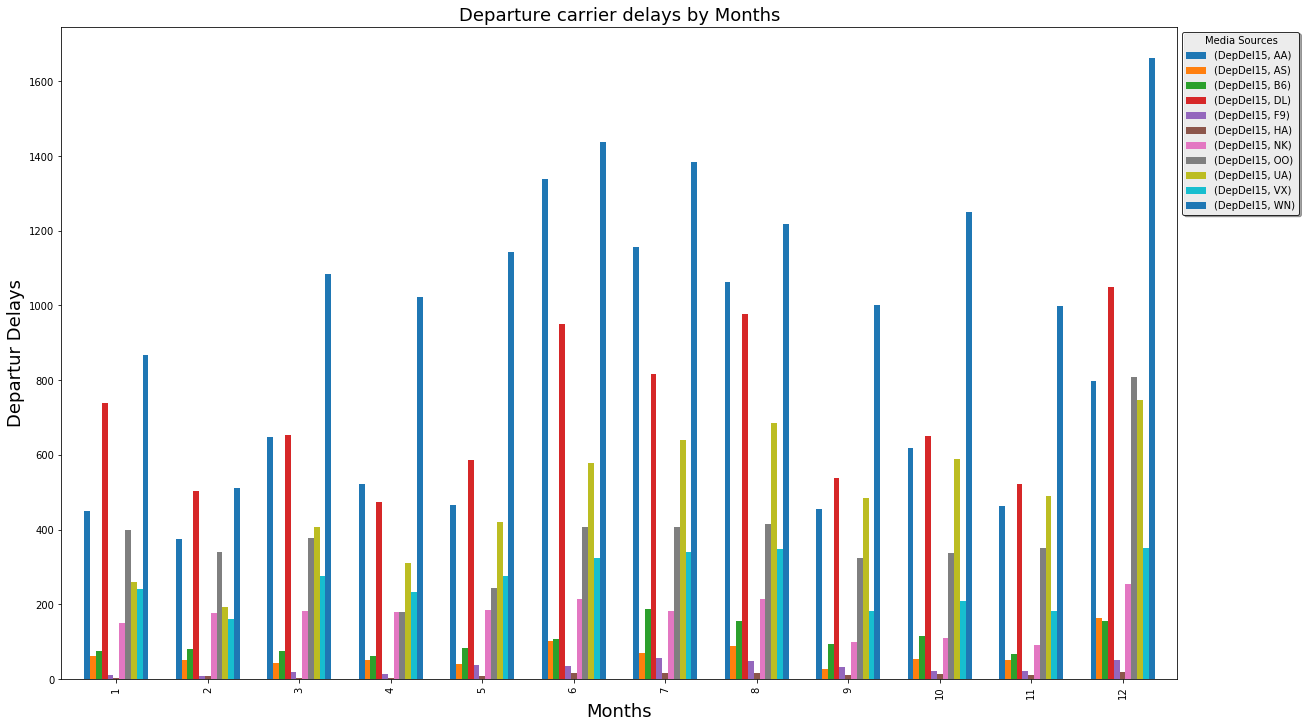

In [59]:
table_depdelay.plot(kind='bar',figsize=(20,12), width=0.7)
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Months',fontsize='18')
plt.ylabel('Departur Delays',fontsize='18')
plt.title('Departure carrier delays by Months',fontsize='18')
plt.savefig('OriginFlights_Departure carrier delays by months')
plt.show()

In [7]:
# Total departure delayed by cities 
table_depdelay1 = pd.pivot_table(flight_delay_origin, values=['DepDel15'], index=['DestCityName'], columns='Month', aggfunc=np.sum)   
table_depdelay1

DepDel15                                     \
Month                               1      2      3      4      5      6    
DestCityName                                                                
Albuquerque, NM                   24.0   21.0   27.0   27.0   34.0   36.0   
Anchorage, AK                      3.0    2.0    0.0    1.0    3.0   17.0   
Aspen, CO                         16.0   24.0   26.0    1.0    NaN    5.0   
Atlanta, GA                      138.0   98.0  128.0   87.0  107.0  160.0   
Austin, TX                        32.0   28.0   58.0   33.0   36.0   72.0   
Baltimore, MD                     26.0   20.0   35.0   23.0   29.0   55.0   
Bend/Redmond, OR                   NaN    NaN    NaN    NaN    NaN    8.0   
Boise, ID                          6.0    8.0    6.0    4.0    4.0   18.0   
Boston, MA                        40.0   36.0   61.0   58.0   65.0  117.0   
Bozeman, MT                        0.0    5.0    4.0    0.0    NaN    NaN   
Buffalo, NY                        NaN    NaN    NaN    NaN    NaN    6.0   
Cedar Rapids/Iowa City, IA         0.0    NaN    NaN    NaN    NaN    NaN   
Charlotte, NC                     18.0   19.0   40.0   28.0   25.0   50.0   
Chicago, IL                      124.0  106.0  154.0  133.0  163.0  278.0   
Cincinnati, OH                    12.0    7.0   15.0   12.0   16.0   24.0   
Cleveland, OH                     13.0   16.0   15.0   19.0   14.0   27.0   
Colorado Springs, CO              11.0   10.0    8.0    8.0    3.0    6.0   
Columbus, OH                      10.0    9.0   10.0    6.0    8.0   21.0   
Dallas, TX                        49.0   41.0   71.0   61.0   51.0   46.0   
Dallas/Fort Worth, TX             98.0   77.0  145.0  105.0   93.0  214.0   
Denver, CO                        59.0   50.0  126.0   99.0  145.0  164.0   
Detroit, MI                       69.0   46.0   42.0   25.0   37.0   64.0   
Durango, CO                        NaN    NaN    NaN    NaN    NaN    0.0   
Eagle, CO                          1.0    5.0    4.0    0.0    NaN    0.0   
El Paso, TX                       17.0   10.0   24.0   17.0   19.0   43.0   
Eugene, OR                         1.0    0.0    NaN    NaN    NaN   13.0   
Fort Lauderdale, FL               69.0   42.0   68.0   54.0   45.0   52.0   
Fresno, CA                        14.0    6.0   16.0    9.0   21.0   38.0   
Hartford, CT                       NaN    NaN    NaN    NaN    NaN    6.0   
Hayden, CO                         7.0    1.0    2.0    NaN    NaN    NaN   
...                                ...    ...    ...    ...    ...    ...   
Nashville, TN                     31.0   32.0   35.0   25.0   19.0   74.0   
New Orleans, LA                   47.0   39.0   32.0   40.0   35.0   79.0   
New York, NY                     134.0  154.0  193.0  142.0  173.0  316.0   
Newark, NJ                        56.0   49.0   90.0   73.0   93.0  153.0   
Oakland, CA                      102.0   59.0  106.0  125.0  159.0  227.0   
Oklahoma City, OK                  4.0    8.0    7.0    3.0    2.0    6.0   
Omaha, NE                          NaN    NaN    NaN    NaN    NaN   19.0   
Orlando, FL                       36.0   26.0   49.0   42.0   61.0  102.0   
Palm Springs, CA                   5.0    2.0    6.0    4.0    1.0    5.0   
Philadelphia, PA                  17.0   20.0   32.0   18.0   29.0   63.0   
Phoenix, AZ                      173.0  100.0  184.0  117.0  151.0  212.0   
Pittsburgh, PA                     2.0    3.0    2.0    5.0    7.0    8.0   
Portland, OR                      56.0   26.0   42.0   50.0   64.0   99.0   
Raleigh/Durham, NC                15.0   11.0    9.0   12.0   12.0   36.0   
Reno, NV                          18.0   16.0   32.0   25.0   24.0   45.0   
Sacramento, CA                    96.0   56.0  107.0   87.0   99.0  162.0   
Salt Lake City, UT               107.0   81.0   79.0   67.0   47.0  122.0   
San Antonio, TX                   30.0   22.0   26.0   30.0   41.0   31.0   
San Diego, CA             

In [11]:
# Total Arrival delayed by carrier
table_arrdelay = pd.pivot_table(flight_delay_origin, values=['ArrDel15'], columns=['Carrier'], index='Month', aggfunc=np.sum)   
table_arrdelay

ArrDel15                                                               \
Carrier       AA     AS     B6     DL    F9    HA     NK     OO     UA     VX   
Month                                                                           
1          623.0   73.0  101.0  654.0  13.0  54.0  166.0  383.0  298.0  261.0   
2          454.0   64.0  111.0  373.0  10.0  21.0  191.0  332.0  210.0  181.0   
3          770.0   79.0   72.0  485.0  15.0  22.0  205.0  386.0  371.0  299.0   
4          567.0   70.0   85.0  450.0  16.0   7.0  171.0  166.0  234.0  268.0   
5          500.0   62.0   59.0  414.0  39.0  17.0  182.0  229.0  314.0  269.0   
6         1378.0  133.0   94.0  830.0  45.0  20.0  234.0  480.0  503.0  353.0   
7         1255.0  130.0  156.0  717.0  73.0  18.0  186.0  450.0  561.0  360.0   
8         1181.0  144.0  138.0  888.0  67.0  17.0  203.0  458.0  619.0  390.0   
9          596.0   73.0  103.0  491.0  38.0  21.0  101.0  369.0  430.0  238.0   
10         612.0   75.0   77.0  437.0  25.0  21.0  106.0  365.0  465.0  273.0   
11         610.0  106.0  131.0  449.0  25.0  13.0  121.0  380.0  446.0  293.0   
12         703.0  206.0  109.0  708.0  45.0  50.0  226.0  816.0  568.0  345.0   

                 
Carrier      WN  
Month            
1         825.0  
2         448.0  
3        1035.0  
4         970.0  
5        1009.0  
6        1376.0  
7        1230.0  
8        1209.0  
9         949.0  
10       1072.0  
11        963.0  
12       1499.0

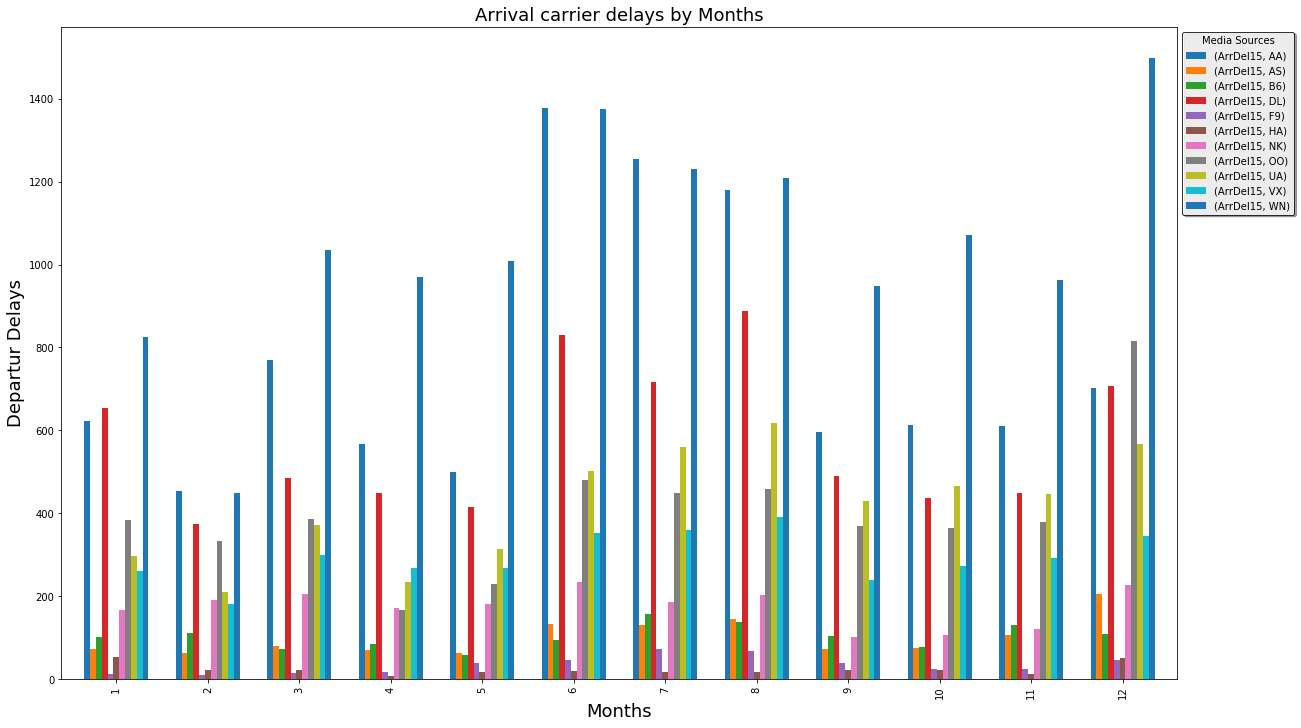

In [53]:
table_arrdelay.plot(kind='bar',figsize=(20,12), width=0.7)
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlabel('Months',fontsize='18')
plt.ylabel('Departur Delays',fontsize='18')
plt.title('Arrival carrier delays by Months',fontsize='18')
plt.savefig('OriginFlights_Arrival carrier delays by months')
plt.show()

In [17]:
# Total Arrival delayed by cities 
table_arrdelay1 = pd.pivot_table(flight_delay_origin, values=['ArrDel15'], index=['DestCityName'], columns='Month', aggfunc=np.sum)   
table_arrdelay1

ArrDel15                                     \
Month                               1      2      3      4      5      6    
DestCityName                                                                
Albuquerque, NM                   21.0   20.0   24.0   25.0   37.0   43.0   
Anchorage, AK                      1.0    1.0    5.0    2.0    5.0   17.0   
Aspen, CO                         13.0   28.0   32.0    1.0    NaN    7.0   
Atlanta, GA                      130.0   74.0   86.0   61.0   63.0  141.0   
Austin, TX                        25.0   20.0   48.0   27.0   29.0   80.0   
Baltimore, MD                     20.0   12.0   28.0   22.0   22.0   44.0   
Bend/Redmond, OR                   NaN    NaN    NaN    NaN    NaN   12.0   
Boise, ID                          6.0    7.0    6.0    7.0    4.0   15.0   
Boston, MA                        50.0   52.0   52.0   78.0   57.0  106.0   
Bozeman, MT                        1.0    2.0    4.0    1.0    NaN    NaN   
Buffalo, NY                        NaN    NaN    NaN    NaN    NaN    5.0   
Cedar Rapids/Iowa City, IA         0.0    NaN    NaN    NaN    NaN    NaN   
Charlotte, NC                     22.0   19.0   38.0   23.0   21.0   61.0   
Chicago, IL                      133.0  108.0  129.0  128.0  136.0  252.0   
Cincinnati, OH                     8.0    6.0    5.0   11.0   10.0   20.0   
Cleveland, OH                     11.0   18.0   15.0   12.0   12.0   24.0   
Colorado Springs, CO              10.0    7.0    9.0   10.0    6.0   17.0   
Columbus, OH                      12.0    7.0    7.0    9.0    5.0   17.0   
Dallas, TX                        40.0   31.0   63.0   55.0   47.0   70.0   
Dallas/Fort Worth, TX            105.0   81.0  169.0  103.0   94.0  235.0   
Denver, CO                        54.0   43.0  105.0   90.0  138.0  167.0   
Detroit, MI                       54.0   36.0   23.0   23.0   19.0   45.0   
Durango, CO                        NaN    NaN    NaN    NaN    NaN    1.0   
Eagle, CO                          3.0    5.0    5.0    0.0    NaN    0.0   
El Paso, TX                       14.0    9.0   20.0   20.0   20.0   41.0   
Eugene, OR                         1.0    1.0    NaN    NaN    NaN   13.0   
Fort Lauderdale, FL               63.0   41.0   81.0   45.0   26.0   55.0   
Fresno, CA                        14.0    8.0   15.0    6.0   17.0   41.0   
Hartford, CT                       NaN    NaN    NaN    NaN    NaN    6.0   
Hayden, CO                         2.0    1.0    2.0    NaN    NaN    NaN   
...                                ...    ...    ...    ...    ...    ...   
Nashville, TN                     26.0   29.0   32.0   21.0   11.0   70.0   
New Orleans, LA                   39.0   28.0   31.0   36.0   26.0   69.0   
New York, NY                     176.0  226.0  169.0  180.0  150.0  305.0   
Newark, NJ                        60.0   67.0   73.0   59.0   62.0  144.0   
Oakland, CA                      106.0   54.0  116.0  119.0  140.0  213.0   
Oklahoma City, OK                  6.0    8.0    7.0    1.0    2.0    5.0   
Omaha, NE                          NaN    NaN    NaN    NaN    NaN   17.0   
Orlando, FL                       38.0   23.0   50.0   40.0   42.0   91.0   
Palm Springs, CA                   4.0    2.0    6.0    4.0    2.0    5.0   
Philadelphia, PA                  22.0   22.0   31.0   22.0   30.0   63.0   
Phoenix, AZ                      173.0  106.0  179.0  126.0  152.0  216.0   
Pittsburgh, PA                     4.0    2.0    3.0    2.0    5.0    7.0   
Portland, OR                      49.0   22.0   45.0   54.0   55.0   97.0   
Raleigh/Durham, NC                12.0    9.0   12.0   12.0   10.0   29.0   
Reno, NV                          15.0   17.0   32.0   19.0   22.0   51.0   
Sacramento, CA                    90.0   50.0  107.0   75.0   86.0  162.0   
Salt Lake City, UT                91.0   58.0   61.0   62.0   47.0  108.0   
San Antonio, TX                   29.0   20.0   24.0   22.0   31.0   24.0   
San Diego, CA             

#### What time of day are delays happening?

In [13]:
flight_delay_origin.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'Carrier', 'TailNum', 'FlightNum', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'OriginWac', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CarrierName'],
      dtype='object')

In [15]:
df1_deptime = flight_delay_origin[['DepTime','Carrier','DepDel15']]
df1_deptime = pd.DataFrame(df1_deptime)
df1_deptime.head()

,DepTime,Carrier,DepDel15
0,1443.0,AA,1.0
1,1318.0,AA,0.0
2,1315.0,AA,0.0
3,1317.0,AA,0.0
4,1327.0,AA,0.0


In [16]:
delay_times = df1_deptime.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_times['Departure_Times'] = pd.cut(delay_times['DepTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)


In [17]:
df1 = delay_times.groupby('Departure_Times')['DepDel15','Carrier'].sum()
df1.reset_index()

,Departure_Times,DepDel15
0,Early Morning(00:01am to 5:59am),2922.0
1,Morning(6:00am to 11:59am),12279.0
2,Noon(12:00pm to 5:59pm),17527.0
3,Evening(6:00pm to 23:59pm),15730.0


In [55]:
df1.plot(kind='bar',figsize=(10,5))

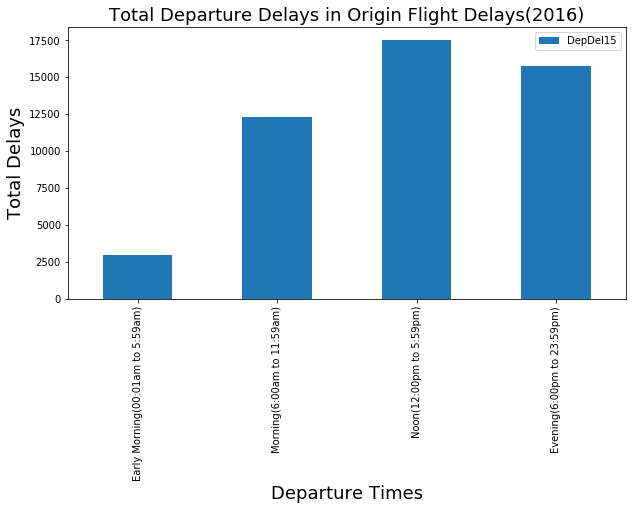

In [56]:
plt.xlabel('Departure Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Departure Delays in Origin Flight Delays(2016)',fontsize='18')
plt.savefig('OriginFlights_Departure delays during day')
plt.show()

In [22]:
df_arrtime1 = flight_delay_origin[['ArrTime','Carrier','ArrDel15']]
df_arrtime1 = pd.DataFrame(df_arrtime1)
df_arrtime1.head()


,ArrTime,Carrier,ArrDel15
0,2217.0,AA,1.0
1,2051.0,AA,0.0
2,2056.0,AA,0.0
3,2134.0,AA,1.0
4,2131.0,AA,1.0


In [23]:
delay_arr_times1 = df_arrtime1.copy()

time_bin = np.array(['Early Morning(00:01am to 5:59am)','Morning(6:00am to 11:59am)','Noon(12:00pm to 5:59pm)', 'Evening(6:00pm to 23:59pm)'])
delay_arr_times1['Arrival_Times'] = pd.cut(delay_arr_times1['ArrTime'],[1.0, 600.0, 1200.0, 1800.0, 2400.0], labels=time_bin)

In [24]:
df4 = delay_arr_times1.groupby('Arrival_Times')['ArrDel15','Carrier'].sum()
df4.reset_index()

,Arrival_Times,ArrDel15
0,Early Morning(00:01am to 5:59am),6000.0
1,Morning(6:00am to 11:59am),7264.0
2,Noon(12:00pm to 5:59pm),14602.0
3,Evening(6:00pm to 23:59pm),19402.0


In [26]:
df4['ArrDel15'].sum()

47268.0

In [57]:
df4.plot(kind='bar',figsize=(10,5))

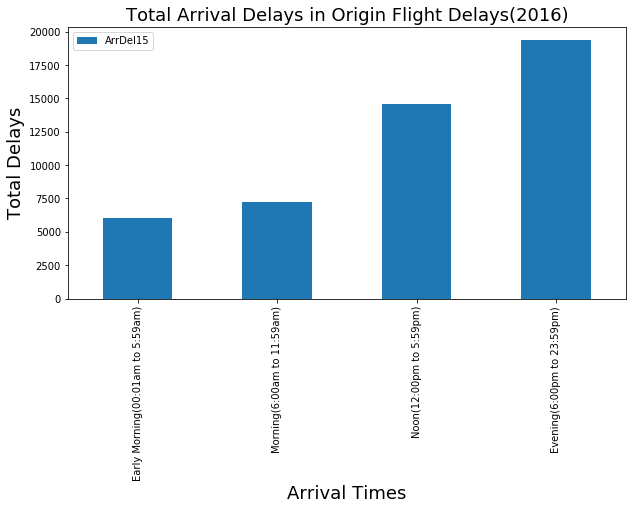

In [58]:
plt.xlabel('Arrival Times',fontsize='18')
plt.ylabel('Total Delays',fontsize='18')
plt.title('Total Arrival Delays in Origin Flight Delays(2016)',fontsize='18')
plt.savefig('OriginFlights_Arrivale delays during day')

plt.show()